# **Step1_AI 강사 Agent v1.0**

## **0. 미션**

### 미션① : AI 강의 영상 제작 단계별 구축하기
* State 정의
* 1page ppt 파일 인식  텍스트, 표, 그림 저장
* 정보 분석 : 텍스트, 표, 그림 등 정보로 부터 내용 정리(LLM)
* 설명 흐름 정리 및 설명문 생성(LLM)




### 미션② : AI 강의 영상 제작 전체 흐름 엮어내기
* 설명문을 음성으로 변환(TTS)
* 음성과 슬라이드 스냅샷 이미지 합성하여 영상 제작하기
* 전체를 Agent 그래프로 엮기


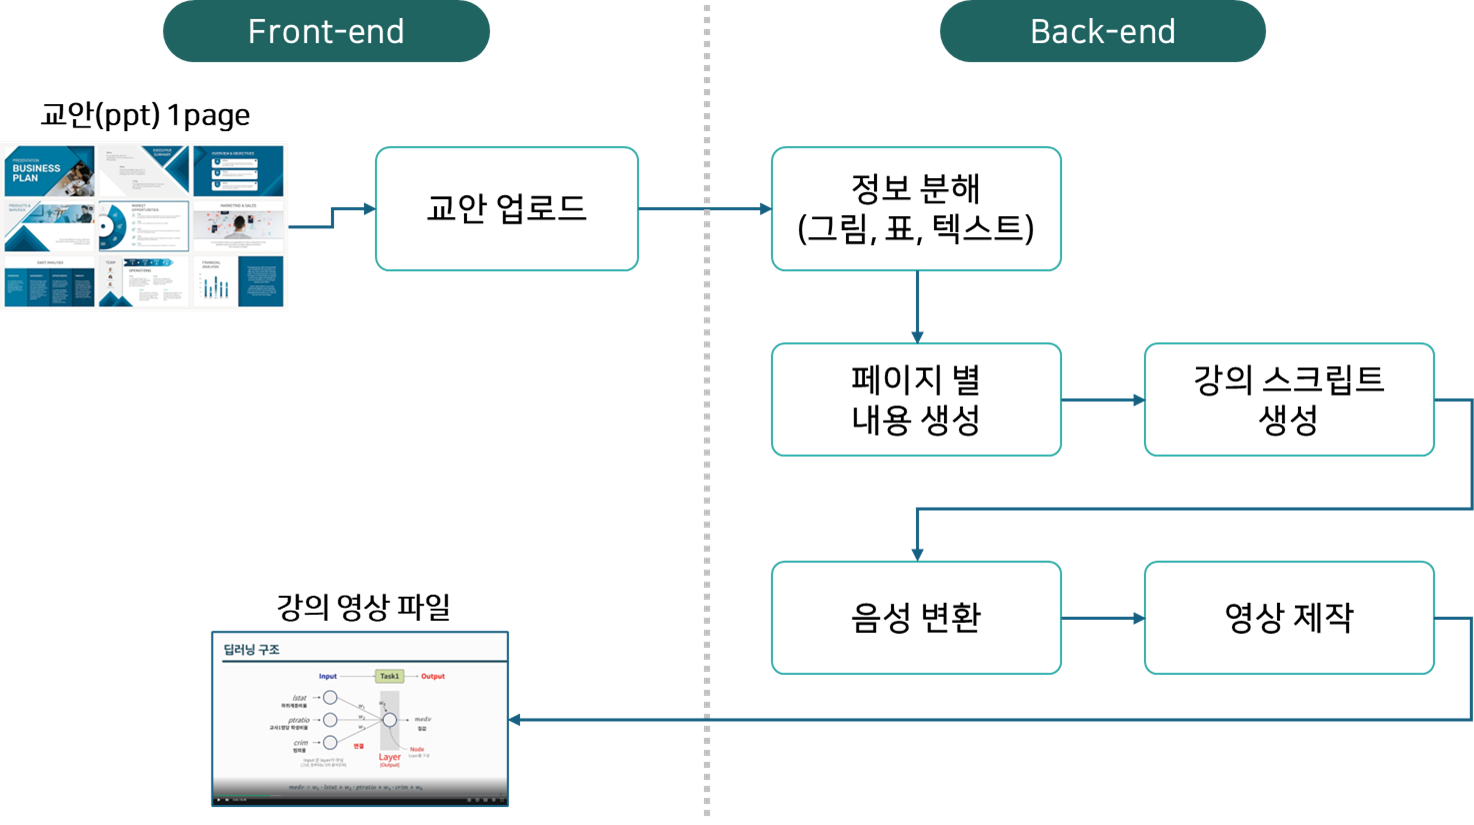

## **1. 환경준비**

### (1) 구글 드라이브

* 구글 드라이브 폴더 생성
    * 새 폴더(project_multi_modal)를 생성하고
    * 제공 받은 파일을 업로드

* 구글 드라이브 연결

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### (2) 한글 폰트 준비
* 한글 폰트 설치 및 설정 코드
* 영상 제작 등 한글 사용시 필요

In [2]:
!apt-get -y install ffmpeg libreoffice poppler-utils poppler-data locales \
                   fonts-noto-cjk fonts-noto-cjk-extra fonts-nanum fonts-unfonts-core
!sed -i 's/^# *ko_KR.UTF-8 UTF-8/ko_KR.UTF-8 UTF-8/' /etc/locale.gen
!locale-gen ko_KR.UTF-8
!update-locale LANG=ko_KR.UTF-8
!fc-cache -fv

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
locales is already the newest version (2.35-0ubuntu3.11).
ffmpeg is already the newest version (7:4.4.2-0ubuntu0.22.04.1).
The following additional packages will be installed:
  apparmor at-spi2-core ca-certificates-java default-jre default-jre-headless
  dictionaries-common firebird3.0-common firebird3.0-common-doc
  firebird3.0-server-core firebird3.0-utils fonts-crosextra-caladea
  fonts-crosextra-carlito fonts-dejavu fonts-dejavu-core fonts-dejavu-extra
  fonts-liberation2 fonts-linuxlibertine fonts-noto-core fonts-noto-extra
  fonts-noto-mono fonts-noto-ui-core fonts-opensymbol fonts-sil-gentium
  fonts-sil-gentium-basic gsettings-desktop-schemas gstreamer1.0-gl
  gstreamer1.0-gtk3 gstreamer1.0-plugins-base hunspell-en-us java-common
  libabsl20210324 libabw-0.1-1 libatk-bridge2.0-0 libatk-wrapper-java
  libatk-wrapper-java-jni libatk1.0-0 libatk1.0-data libatspi2.0-0
  libboost-filesy

In [3]:
%%bash
mkdir -p ~/.config/fontconfig
cat > ~/.config/fontconfig/fonts.conf <<'EOF'
<?xml version="1.0"?>
<!DOCTYPE fontconfig SYSTEM "fonts.dtd">
<fontconfig>

  <!-- ▷ 한국어 텍스트엔 Noto Sans CJK KR을 우선 사용 -->
  <match target="pattern">
    <test name="lang" compare="eq"><string>ko</string></test>
    <edit name="family" mode="prepend" binding="strong">
      <string>Noto Sans CJK KR</string>
    </edit>
  </match>

  <!-- ▷ 일반 가족명에도 기본 대체 추가 -->
  <alias><family>sans-serif</family><prefer><family>Noto Sans CJK KR</family></prefer></alias>
  <alias><family>serif</family><prefer><family>Noto Serif CJK KR</family></prefer></alias>
  <alias><family>monospace</family><prefer><family>Noto Sans Mono CJK KR</family></prefer></alias>

  <!-- ▷ Windows/macOS/웹에서 흔한 한글 폰트들을 Noto로 매핑 -->
  <alias><family>Malgun Gothic</family>        <prefer><family>Noto Sans CJK KR</family></prefer></alias>
  <alias><family>맑은 고딕</family>             <prefer><family>Noto Sans CJK KR</family></prefer></alias>
  <alias><family>Apple SD Gothic Neo</family>  <prefer><family>Noto Sans CJK KR</family></prefer></alias>
  <alias><family>AppleGothic</family>          <prefer><family>Noto Sans CJK KR</family></prefer></alias>
  <alias><family>Pretendard</family>           <prefer><family>Noto Sans CJK KR</family></prefer></alias>
  <alias><family>Pretendard Variable</family>  <prefer><family>Noto Sans CJK KR</family></prefer></alias>
  <alias><family>NanumSquare</family>          <prefer><family>Noto Sans CJK KR</family></prefer></alias>
  <alias><family>Spoqa Han Sans</family>       <prefer><family>Noto Sans CJK KR</family></prefer></alias>
  <alias><family>KoPub</family>                <prefer><family>Noto Sans CJK KR</family></prefer></alias>
  <alias><family>Gulim</family>                <prefer><family>Noto Sans CJK KR</family></prefer></alias>
  <alias><family>Dotum</family>                <prefer><family>Noto Sans CJK KR</family></prefer></alias>
  <alias><family>Batang</family>               <prefer><family>Noto Serif CJK KR</family></prefer></alias>
</fontconfig>
EOF
fc-cache -fv


/usr/share/fonts: caching, new cache contents: 0 fonts, 4 dirs
/usr/share/fonts/cMap: caching, new cache contents: 0 fonts, 0 dirs
/usr/share/fonts/cmap: caching, new cache contents: 0 fonts, 5 dirs
/usr/share/fonts/cmap/adobe-cns1: caching, new cache contents: 0 fonts, 0 dirs
/usr/share/fonts/cmap/adobe-gb1: caching, new cache contents: 0 fonts, 0 dirs
/usr/share/fonts/cmap/adobe-japan1: caching, new cache contents: 0 fonts, 0 dirs
/usr/share/fonts/cmap/adobe-japan2: caching, new cache contents: 0 fonts, 0 dirs
/usr/share/fonts/cmap/adobe-korea1: caching, new cache contents: 0 fonts, 0 dirs
/usr/share/fonts/opentype: caching, new cache contents: 0 fonts, 2 dirs
/usr/share/fonts/opentype/linux-libertine: caching, new cache contents: 13 fonts, 0 dirs
/usr/share/fonts/opentype/noto: caching, new cache contents: 80 fonts, 0 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 11 dirs
/usr/share/fonts/truetype/crosextra: caching, new cache contents: 8 fonts, 0 dirs
/usr/sh

### (3) 라이브러리

* 필요한 라이브러리 설치

In [4]:
!apt-get -y install ffmpeg libreoffice poppler-utils
!uv pip install python-pptx pillow langgraph -q

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
poppler-utils is already the newest version (22.02.0-2ubuntu0.12).
ffmpeg is already the newest version (7:4.4.2-0ubuntu0.22.04.1).
libreoffice is already the newest version (1:7.3.7-0ubuntu0.22.04.10).
0 upgraded, 0 newly installed, 0 to remove and 41 not upgraded.


* 라이브러리 로딩

In [5]:
import os, re, textwrap, subprocess, json, base64, mimetypes, shlex
from pathlib import Path
from dataclasses import dataclass
from typing import List, Dict, Optional, TypedDict
from PIL import Image, ImageDraw
from pptx import Presentation
from pptx.enum.shapes import MSO_SHAPE_TYPE
from openai import OpenAI
from google.colab import files
from IPython.display import Audio, display, Video

### (4) OpenAI API Key 확인
* 구글드라이브에 생성한 폴더 'project_multi_modal'에서
* api_key.txt 파일 안에 각자 발급 받은 openai api key를 저장합니다.

In [7]:
def load_api_keys(filepath="api_key.txt"):
    with open(filepath, "r") as f:
        for line in f:
            line = line.strip()
            if line and "=" in line:
                key, value = line.split("=", 1)
                os.environ[key.strip()] = value.strip()

path = '/content/drive/MyDrive/langchain/'
# API 키 로드 및 환경변수 설정
load_api_keys(path + 'api_key.txt')

⚠️ 아래 코드셀은, 실행해서 key가 제대로 보이는지 확인하고 삭제하세요.

In [8]:
print(os.environ['OPENAI_API_KEY'][:30])

sk-proj--g_9dmXqyvfK-dEpaTsQXe


### (5) 유용한 함수들 제공
* 다음은 프로젝트를 수행하는데 유용한 함수들입니다.
* 이 함수들의 내용을 확인하고 필요시 활용하여 개인 과제를 수행합니다.(꼭 활용해야 하는 것은 아닙니다.)

* 공백 제거 함수

In [9]:
def clean_text(s):
    return re.sub(r"\s+", " ", s).strip()

In [10]:
# 사용 예
raw_text = " 딥러닝    모델 \n\n 학습에는 \t 많은   데이터가 필요합니다.  "
print("* 원본:", raw_text)
print("* 정제 후:", clean_text(raw_text))

* 원본:  딥러닝    모델 

 학습에는 	 많은   데이터가 필요합니다.  
* 정제 후: 딥러닝 모델 학습에는 많은 데이터가 필요합니다.


* 긴 문자열을 문장 단위로 나누는 문장 분리기

In [11]:
def split_sents(t: str) -> List[str]:
    parts = re.split(r'([\.?!])', t)
    merged = []
    for i in range(0, len(parts)-1, 2):
        sent = (parts[i] + parts[i+1]).strip()
        if sent: merged.append(sent)
    if len(parts) % 2 == 1 and parts[-1].strip():
        merged.append(parts[-1].strip())
    return [s for s in merged if s]

In [12]:
# 사용 예
text = "안녕하세요. 오늘은 날씨가 좋네요! 점심 드셨어요?"
print(split_sents(text))

['안녕하세요.', '오늘은 날씨가 좋네요!', '점심 드셨어요?']


* 오디오 길이 계산

In [13]:
def ffprobe_duration(path: str) -> float:
    out = subprocess.check_output([
        "ffprobe","-v","error","-show_entries","format=duration",
        "-of","default=noprint_wrappers=1:nokey=1", path]).decode().strip()
    return float(out)

In [15]:
# 사용 예
uploaded = files.upload()   # 로컬 PC에서 '스티브 잡스4.mp3' 선택

mp3_file = "스티브 잡스4.mp3"
duration = ffprobe_duration(mp3_file)
print(f"{mp3_file} 길이: {duration:.2f}초")

Saving 스티브 잡스4.mp3 to 스티브 잡스4.mp3
스티브 잡스4.mp3 길이: 58.82초


* 이미지를 base64로 변환

In [16]:
def img_to_data_url(path: str) -> str:
    mime = mimetypes.guess_type(path)[0] or "image/png"
    with open(path, "rb") as f:
        b64 = base64.b64encode(f.read()).decode("utf-8")
    return f"data:{mime};base64,{b64}"

In [17]:
# 사용 예
uploaded = files.upload()   # 로컬 PC에서 'cat_bird.jpg' 선택

png_path = "cat_bird.jpg"
data_url = img_to_data_url(png_path)
print(data_url[:100] + "...")   # 앞부분만 출력 (너무 길기 때문)

Saving cat_bird.jpg to cat_bird.jpg
data:image/jpeg;base64,/9j/4AAQSkZJRgABAQIASABIAAD/7QAsUGhvdG9zaG9wIDMuMAA4QklNBAQAAAAAAA8cAkEAClRvc...


* 배경 이미지와 오디오 합쳐서 MP4 영상 만들기

In [18]:
def render_mp4(image_path: str, audio_path: str, out_mp4: str,
               width=1920, height=1080, ):

    dur = ffprobe_duration(audio_path)

    vf = (f"scale={width}:{height}:force_original_aspect_ratio=decrease,"
          f"pad={width}:{height}:(ow-iw)/2:(oh-ih)/2:color=black"  )

    # FFmpeg 명령
    cmd = ["ffmpeg", "-y",
            "-loop", "1", "-i", image_path,   # 정지 이미지 입력
            "-i", audio_path,                 # 오디오 입력
            "-t", str(dur),                   # 길이 = 오디오 길이
            "-vf", vf,                        # 비디오 필터
            "-c:v", "libx264", "-preset", "veryfast", "-crf", "20",
            "-c:a", "aac", "-b:a", "192k",
            "-pix_fmt", "yuv420p",
            "-movflags", "+faststart",        # 웹/브라우저 재생 친화
            out_mp4]
    subprocess.check_call(cmd)  # 외부 프로그램(FFmpeg)을 파이썬 프로세스에서 실행하고, 성공했는지 확인

In [19]:
# 사용 예
# 이미 업로드한 cat_bird.jpg, 스티브 잡스4.mp3 를 합성

# 예시 파일 준비
image_path = "cat_bird.jpg"          # PPT 슬라이드 캡처
audio_path = "스티브 잡스4.mp3"      # 해당 슬라이드 설명 음성
output_path = "video.mp4" # 합성 결과

# 함수 실행
render_mp4(image_path, audio_path, output_path)

# 영상 확인
with open(output_path, "rb") as f:
    data = f.read()

display(Video(data=data, embed=True, mimetype="video/mp4", width=960))

Output hidden; open in https://colab.research.google.com to view.

## **2. 미션① : AI 강의 영상 제작 단계별 구축하기**

* State 정의
* 1page ppt 파일 인식  텍스트, 표, 그림 저장
* 정보 분석 : 텍스트, 표, 그림 등 정보로 부터 내용 정리(LLM)
* 설명 흐름 정리 및 설명문 생성(LLM)

### (1) 파일 입력

* ppt, image 업로드 코드 제공
    * sample1.pptx 와 sample1.png 제공



In [20]:
# 파일 업로드 (sample1.pptx)
uploaded = files.upload()
pptx_path = list(uploaded.keys())[0]


Saving sample1.pptx to sample1.pptx


In [21]:
# 파일 업로드 (sample1.png)
uploaded = files.upload()
slide_image_path = list(uploaded.keys())[0]

Saving sample1.png to sample1.png


In [22]:
# 사용자 프롬프트
USER_PROMPT = {
    "voice": "alloy",
    "tone": "친절하고 명료한 강의 톤",
    "style": "예시와 핵심 요점 중심"
}
# 출력 dir 만들기
WORK_DIR = "./step1_output"
MEDIA_DIR = "./step1_output/media"
os.makedirs(WORK_DIR, exist_ok=True)
os.makedirs(MEDIA_DIR, exist_ok=True)

### (2) State 선언

* 각 노드의 입출력 관리를 위한 State 구성
    * 각 함수(노드)에서 채워가며 관리해야 할 정보를 도출
    * 이를 하나의 State로 정의


In [23]:
# State 정의 및 초기화
class State(TypedDict, total=False): # total=False는 TypedDict에서 모든 키를 선택(optional)으로 취급
    # 입력/기본
    pptx_path: str
    work_dir: str
    prompt: Dict
    slide_index: int

    # 추출 산출물
    texts: List[str]
    tables: List[List[List[str]]]
    images: List[str]
    slide_image: List[str]

    # 생성 산출물
    page_content: List[str]
    script: str

    # 미디어 산출물 경로
    audio: str
    video: str

In [24]:
init = State(pptx_path=pptx_path, work_dir=WORK_DIR, prompt=USER_PROMPT, slide_index=0, texts=[], tables=[], images=[], slide_image=[slide_image_path], page_content=[], script="", audio="", video="")

### (3) 정보 분해
* 목적 : 첫 번째 슬라이드에서 텍스트, 표, 이미지를 추출하여 state에 저장
* 입/출력
    * 입력: state["pptx_path"] (PPTX 경로), slide_index (현재는 무시, 0고정)
    * 출력 : state["texts"], state["tables"], state["images"] 갱신
* 처리
    * 슬라이드의 각 shape 탐색
    * 텍스트 → 문단 단위 추출 후 clean_text로 정제
    * 표 → 2차원 리스트로 변환 후 저장
    * 이미지 → 파일로 저장하고 경로를 기록

* 노드 함수 생성

In [25]:
def node_parse_ppt(state: State) -> State:
    ppt = Presentation(state['pptx_path'])
    for i, sh in enumerate(ppt.slides[0].shapes):
        if sh.has_text_frame:
            state['texts'].append([a.text for a in sh.text_frame.paragraphs])
        if sh.shape_type == MSO_SHAPE_TYPE.TABLE:
            table = [ [clean_text(cell.text) for cell in row.cells] for row in sh.table.rows ]
            state['tables'].append(table)
        if sh.shape_type == MSO_SHAPE_TYPE.PICTURE:
            ext = sh.image.ext
            path = os.path.join(MEDIA_DIR, f"slide{ i+1 }_image{ len(state['images'])+1 }.{ ext }")
            with open(path, "wb") as f:
                f.write(sh.image.blob)
            state['images'].append(path)
    return state

* 노드 테스트

In [26]:
n1 = node_parse_ppt(init)

### (4) 내용 생성

* 목적 : 추출된 텍스트·표·이미지를 기반으로 LLM을 호출해 페이지 요약 문단을 생성
* 입/출력
    * 입력: state["texts"], state["tables"], state["images"], state["slide_image"], state["prompt"]
    * 출력: state["page_content"] (LLM 생성 결과 요약 문단)
* 처리
    * 표는 첫 번째 표의 앞 6행만 문자열로 변환
    * 이미지(최대 3개)를 data URL로 인코딩해 멀티모달 입력에 포함
    * 프롬프트 규칙(과장 금지, 4~6문장, 불릿 금지, 스타일 적용, 이미지 설명 포함) 적용
    * LLM 호출 결과를 page_content에 저장

* 노드 함수 생성

In [27]:
LLM_MODEL = "gpt-4o-mini"
TTS_MODEL = "gpt-4o-mini-tts"

In [28]:
def node_generate_text(state: State) -> State:
    openai = OpenAI()
    tables_sample = ""
    if state['tables']:
        table = state['tables'][0]
        tables_sample = "\n".join([
            " | ".join(row)
            for row in table[:6]  # 처음 6행만
        ])
    images = state['images'][1:3]
    img = []
    for img_path in images:
        response_image = openai.chat.completions.create(
            model=LLM_MODEL,
            messages=[
                {"role": "user", "content": [
                        {
                            "type": "text",
                            "text":
                            """
                            다음 이미지에 대한 설명을 작성해주세요.
                            단 불릿 포인트와 과장된 표현은 사용하면 안됩니다.
                            """
                        },
                        {
                            "type": "image_url",
                            "image_url":
                            {
                                "url":
                                f"{img_to_data_url(img_path)}"
                            }
                        }
                    ]
                }
            ]
        )
        content_image = response_image.choices[0].message.content
        img.append(content_image)

    response_text = openai.chat.completions.create(
        model=LLM_MODEL,
        messages=[
            {"role": "system", "content": "아래 스타일을 사용합니다." + state['prompt']['style']},
            {
                "role": "user",
                "content":
                    f"""
                    텍스트
                    {state['texts']}
                    테이블
                    {tables_sample}
                    이미지에 대한 설명
                    {img}
                    위 정보를 보고 강의 요약을 작성해주세요.
                    강의 요약은 4~6문장으로 구성하고 불릿 포인트와 과장된 표현은 사용하면 안됩니다.
                    """
            }
        ]
    )
    content_text = response_text.choices[0].message.content
    state['page_content'].append(content_text)
    return state

* 노드 테스트

In [29]:
n2 = node_generate_text(n1)

In [30]:
n2['page_content']

['이번 강의에서는 Vision Transformer(ViT)의 개요와 CNN의 한계를 살펴보았습니다. CNN은 지역적 패턴 학습에 강하지만, 전역 문맥을 학습하는 데 약점이 있으며, 이미지 크기 변화에 유연성이 부족합니다. 반면, Transformer는 Self-Attention을 통해 전역 정보를 효율적으로 학습할 수 있는 장점을 지니고 있습니다. ViT는 이미지를 패치로 나누어 각 패치를 벡터로 변환한 후, 위치 정보를 더해 Transformer에 입력함으로써 전역 관계를 직접 학습합니다. 이후 다양한 모델들이 ViT의 개념을 기반으로 이미지 이해, 이미지-텍스트 융합, 설명 생성 등의 작업을 수행하고 있음을 설명했습니다.']

### (5) 강의 스크립트 생성

* 목적 : 슬라이드 요약(page_content)을 기반으로 60~90초 분량의 발표 대본(스크립트)을 작성하고 저장
* 입/출력
    * 입력:
        * state["page_content"] (슬라이드 핵심 요약 문단)
        * state["prompt"] (tone 키 사용 → 말투 지시)
        * state["work_dir"] (스크립트 저장 디렉토리)
    * 출력:
        * state["script"] (생성된 발표 스크립트)
        * script.txt 파일 (work_dir 내 저장)
* 처리
    * LLM에 시스템 프롬프트(발표 대본 작성 보조 에이전트)와 사용자 요청(인트로→설명→마무리 구조, 말투, 금지 규칙)을 전달
    * LLM 응답을 문자열로 정리해 state["script"]에 저장
    * 동시에 script.txt로 파일 저장

* 노드 함수 생성

In [31]:
def node_generate_script(state: State) -> State:
    openai = OpenAI()
    response = openai.chat.completions.create(
        model=LLM_MODEL,
        messages=[
            {"role": "system", "content": "아래와 같은 말투를 사용합니다.\n" + state['prompt']['tone']},
            {
                "role": "user",
                "content":
                f"""
                당신은 뛰어는 AI 강사입니다. 다음 내용을 바탕으로 강의 스크립트를 작성해주세요.
                슬라이드 핵심 요약
                {state['page_content']}
                우선 간단한 소개로 시작하고, 본문 내용을 설명한 후, 요약으로 끝내세요.
                강의 스크립트는 약 60~90초 분량으로 작성해주세요.
                """
            }
        ]
    )
    state['script'] += response.choices[0].message.content
    with open(os.path.join(state['work_dir'], "script.txt"), "w") as f:
        f.write(state['script'])
    return state

* 테스트

In [32]:
n3 = node_generate_script(n2)

## **3. 미션② : AI 강의 영상 제작 전체 흐름 엮어내기**

* 설명문을 음성으로 변환(TTS)
* 음성과 슬라이드 스냅샷 이미지 합성하여 영상 제작하기
* 전체를 Agent 그래프로 엮기

### (1) 음성 변환

* 목적 : 발표 스크립트(script)를 TTS 모델을 이용해 음성(mp3) 파일로 변환하고 state에 저장
* 입/출력
    * 입력:
        * state["script"] (발표 대본 텍스트)
        * state["prompt"]["voice"] (선택적, 목소리 프리셋. 기본값 "alloy")
        * state["work_dir"] (오디오 저장 위치)
    * 출력:
        * state["audio"] (생성된 mp3 파일 경로)
        * 콘솔 출력: MP3 길이(sec)
* 처리
    * OpenAI TTS 모델(TTS_MODEL)에 스크립트와 목소리 옵션 전달
    * 응답 받은 음성 데이터를 narration.mp3 파일로 저장
    * ffprobe_duration()으로 생성된 MP3 길이 확인 후 콘솔에 출력
    * state["audio"]에 파일 경로 기록

* 노드 함수 생성

In [33]:
def node_tts(state: State) -> State:
    openai = OpenAI()
    response = openai.audio.speech.create(
        model=TTS_MODEL,
        voice=state['prompt']['voice'],
        input=state['script']
    )
    audio_path = os.path.join(state['work_dir'], "speech.mp3")
    with open(audio_path, "wb") as f:
        f.write(response.read())
    state['audio'] = audio_path

    return state

* 노드 테스트

In [34]:
n4 = node_tts(n3)

In [35]:
# 오디오 play 예시 코드
from IPython.display import Audio, display
audio_path = n4["audio"]
display(Audio(filename=audio_path))
print("Audio file:", audio_path)

Audio file: ./step1_output/speech.mp3


### (2) 영상 제작
* 목적 : 슬라이드 이미지와 음성을 합쳐 mp4 영상 생성
* 입/출력
    * 입력: state["slide_image"][0], state["audio"], state["work_dir"], state["slide_index"]
    * 출력: state["video_path"] (생성된 mp4 경로)
* 처리
    * 첫 번째 슬라이드 이미지를 배경으로 선택
    * 오디오(mp3)와 함께 render_mp4() 호출
    * 결과 영상을 slideN_lecture.mp4로 저장 후 경로 기록

* 노드 함수 생성

In [36]:
def node_make_video(state: State) -> State:
    state['video'] = os.path.join(state['work_dir'], "slide0_lecture.mp4")
    render_mp4(
        image_path=state['slide_image'][0],
        audio_path=state['audio'],
        out_mp4=state['video'],
        width=1920,
        height=1080
    )

    return state

* 노드 테스트

In [37]:
n5 = node_make_video(n4)

In [38]:
# 동영상 play 예시 코드
video_path = n5["video"]

with open(video_path, "rb") as f:
    data = f.read()

display(Video(data=data, embed=True, mimetype="video/mp4", width=960))

Output hidden; open in https://colab.research.google.com to view.

### (3) Agent 만들기 : 그래프로 엮기
* 다음 그래프를 참조하여 하나의 에이전트로 엮어 봅시다.

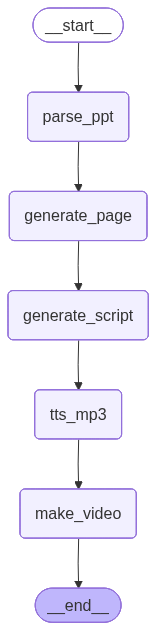

In [39]:
from langgraph.graph import StateGraph, END
builder = StateGraph(State)

builder.add_node("parse_ppt", node_parse_ppt)
builder.add_node("generate_page", node_generate_text)
builder.add_node("generate_script", node_generate_script)
builder.add_node("tts_mp3", node_tts),
builder.add_node("make_video", node_make_video)

builder.set_entry_point("parse_ppt")
builder.add_edge("parse_ppt", "generate_page")
builder.add_edge("generate_page", "generate_script")
builder.add_edge("generate_script", "tts_mp3")
builder.add_edge("tts_mp3", "make_video")
builder.add_edge("make_video", END)

app = builder.compile()

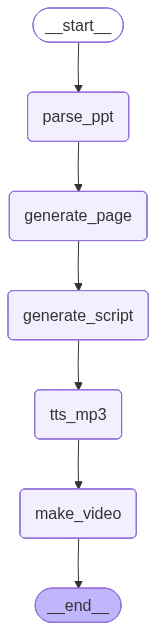

In [40]:
from IPython.display import Image, display

# 외부 서버를 호출하는 동안 대기시간 초과로 오류가 날 수 있습니다.
try:
    display(Image(app.get_graph().draw_mermaid_png()))
except Exception:
    pass

## **4. 시스템 실행**

미션1,2에서 수행한 결과를 통합 테스트 해 봅시다.

### (1) 준비 작업
* 파일 업로드
* 사용자 프롬프트 준비

In [41]:
# 파일 업로드 (1page PPTX)
pptx_path = "sample1.pptx"

In [42]:
# 파일 업로드 (1page image)
image_path = "sample1.png"

In [43]:
# 사용자 프롬프트
USER_PROMPT = {
    "voice": "alloy",
    "tone": "친절하고 명료한 강의 톤",
    "style": "예시와 핵심 요점 중심"
}

# 출력 dir 만들기

OUTPUT_DIR = "output"
os.makedirs(OUTPUT_DIR, exist_ok=True)


### (2) Agent 실행
* State 초기화
* app 실행
* 동영상 play

In [44]:
state = State(
    pptx_path=pptx_path,
    work_dir=OUTPUT_DIR,
    prompt=USER_PROMPT,
    slide_index=0,
    texts=[],
    tables=[],
    images=[],
    slide_image=[image_path],
    page_content=[],
    script="",
    audio="",
    video=""
)

In [45]:
state

{'pptx_path': 'sample1.pptx',
 'work_dir': 'output',
 'prompt': {'voice': 'alloy',
  'tone': '친절하고 명료한 강의 톤',
  'style': '예시와 핵심 요점 중심'},
 'slide_index': 0,
 'texts': [],
 'tables': [],
 'images': [],
 'slide_image': ['sample1.png'],
 'page_content': [],
 'script': '',
 'audio': '',
 'video': ''}

In [46]:
# 전체 그래프 실행
result = app.invoke(state)

# 영상 재생
video_path = result['video']
with open(video_path, "rb") as f:
    data = f.read()
display(Video(data=data, embed=True, mimetype="video/mp4", width=960))

Output hidden; open in https://colab.research.google.com to view.